In [3]:
%pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


Note: you may need to restart the kernel to use updated packages.


In [4]:
#Extract data
data = pd.read_csv("./data/project_train.csv")
testdata = pd.read_csv("./data/project_test.csv")
inputs = data.iloc[:,:11]
labels = data.iloc[:,11]

In [5]:
def random_subsample(ratio, data, labels):
    assert 0 < ratio < 1

    sliced = int(ratio * data.shape[0])

    idx = np.arange(data.shape[0])
    np.random.shuffle(idx)

    shuffled_data = data.iloc[idx]
    shuffled_labels = labels.iloc[idx]

    return (shuffled_data.iloc[:sliced], shuffled_labels.iloc[:sliced]), (shuffled_data.iloc[sliced:], shuffled_labels.iloc[sliced:])



In [6]:
# create the lda model
modellda = LinearDiscriminantAnalysis()
modelqda = QuadraticDiscriminantAnalysis()
def benchmark(model):
    scores = []
    for ratio in np.linspace(0.05, 0.99, 30):
        _scores = []
        for _ in range(250):
            # Randomly subsample into training and validation data (with a given ratio)
            training, validation = random_subsample(ratio, inputs, labels)
            model.fit(*training)
            score = model.score(*validation)
            _scores.append(score)
        scores.append([ratio, np.mean(_scores), np.std(_scores)])

    return np.array(scores)
score_lda=benchmark(modellda)
score_qda=benchmark(modelqda)


c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\49152\.virtualenvs\song-classifier-e6ONNrbz\li

[Text(0.5, 0, 'Ratio of training data'),
 Text(0, 0.5, 'In validation data performance')]

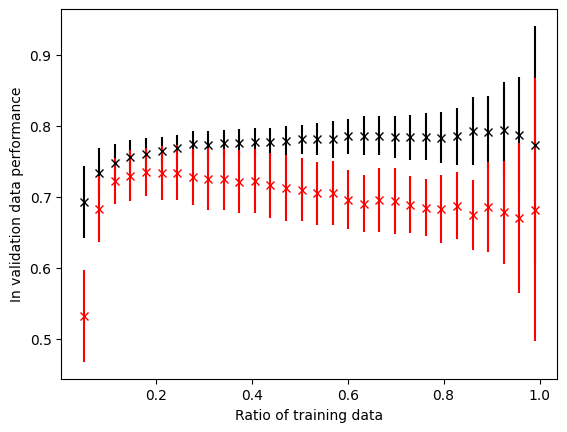

In [7]:
fig, ax = plt.subplots()

ax.errorbar(score_lda[:,0], score_lda[:,1], yerr=score_lda[:,2], fmt='kx')
ax.errorbar(score_qda[:,0], score_qda[:,1], yerr=score_qda[:,2], fmt='rx')
ax.set(**{
    'xlabel': 'Ratio of training data',
    'ylabel': 'In validation data performance',
})

In [12]:
modellda.fit(inputs, labels)
modelqda.fit(inputs, labels)
classifieddata=testdata.copy()
classifieddata['lda_labels'] = s1 = modellda.predict(testdata)
classifieddata['qda_labels'] = s2= modelqda.predict(testdata)
output_lda=','.join(str(i) for i in s1)
output_qda=','.join(str(i) for i in s2)

classifieddata

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lda_labels,qda_labels
0,0.543,0.752,0,-9.986,1,0.1010,0.02240,0.000000,0.0683,0.904,168.122,0,0
1,0.483,0.753,1,-8.937,0,0.0832,0.42500,0.000142,0.2570,0.420,115.102,0,0
2,0.541,0.618,1,-9.652,0,0.1790,0.27700,0.000040,0.4130,0.680,145.464,0,0
3,0.539,0.884,9,-6.530,1,0.0403,0.38200,0.001660,0.7600,0.752,100.812,0,0
4,0.205,0.129,7,-18.197,1,0.0595,0.96800,0.946000,0.1010,0.296,136.871,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.273,0.937,0,-4.425,1,0.0408,0.00562,0.000113,0.1250,0.836,151.228,1,0
71,0.686,0.632,10,-12.031,1,0.0328,0.27800,0.006070,0.4070,0.912,98.242,0,0
72,0.540,0.866,11,-8.168,0,0.4460,0.00216,0.000000,0.0795,0.629,85.187,1,0
73,0.382,0.826,7,-8.159,1,0.3990,0.00386,0.000010,0.0881,0.517,173.016,1,0
